## Import Libraries

In [1]:
import sys
import warnings                                 # `dnd` mode
warnings.filterwarnings('ignore')

In [2]:
import numpy as np                              # Import Numpy library for vectors, matrix, algebra
import pandas as pd                             # Import Pandas library for dataframe preparation and manipulation
import statistics                               # Import Statistics library for basic statistics, if required
from sklearn.preprocessing import LabelEncoder  # Import library to encode categorical data
import statsmodels.api as sm                    # Statsmodel is an essential module to conduct statistical tests
from scipy import stats                         # Scipy builds on Numpy for mathematical computation
from scipy.stats import zscore                  # Import Zscore function from Scipy Stats module
import matplotlib.pyplot as plt                 # Import Pyplot from matplotlib
import seaborn as sns                           # Import Seaborn library for data visualization
sns.set(color_codes = True)                     # data visualization
%matplotlib inline
from sklearn.neighbors import LocalOutlierFactor # To detect outliers using Local Outlier Factor
from simple_colors import *                     # print text formatting 
import imblearn                                 # Import imbalance learn library to tackle imbalanced datasets
from imblearn.over_sampling import SMOTE        # Importing Synthetic Minority Oversampling Technique for imbalanced class data
from collections import Counter                 # Importing Counter, a dictionary subclass, to count hashable objects
from sklearn.model_selection import train_test_split # Importing train test split for splitting data from Scikit Learn
from sklearn.neighbors import KNeighborsClassifier   # Importing KNN Classifier from Scikit Learn         
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression from Scikit Learn
from sklearn.naive_bayes import GaussianNB           # using Gaussian algorithm from Naive Bayes of Scikit Learn
from sklearn import metrics                          # Importing Metrics for Accuracy Testing from Scikit Learn
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score #import the accuracy classes from the library. 
import mglearn                                       # Importing helper package to create figures

## Load and review data

In [3]:
df = pd.read_csv("/Users/kaushik/Desktop/GL_projects/GL_project_data/Bank_Personal_Loan_Modelling.csv") # import bank data from project folder 

In [4]:
print("The shape of the data is : ", df.shape) # provides the number of rows and columns in the dataframe
print(blue("Interpretation:", ["bold"]), "The shape mentioned above implies that the bank data has", df.shape[0], "rows or records, and", df.shape[1], "columns or variables."  )

The shape of the data is :  (5000, 14)
Interpretation: The shape mentioned above implies that the bank data has 5000 rows or records, and 14 columns or variables.


In [5]:
print(blue("The first five records in the bank data table appear as under: ", ['bold']))
df.head(5) # print the first five records in the dataframe

The first five records in the bank data table appear as under: 


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
print(blue("A concise summary of Dataframe and its columns ––", ['bold']))
print(df.info())# To check the dataframe summary include datatype of each column, non-null value count, and memory usage

A concise summary of Dataframe and its columns ––
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


## Dataframe Summary & Analytical Approach
There are 13 variables in the dataframe. All the variables are in numerical (integer/ float) format. Based on the data description provided, there is one index variable– ID, five numerical variables– Age, Experience, Income, CCAvg, and Mortgage, seven object/ categorical variables– Family, Securities Account, CD Account, Online, and Credit Card, and one categorical label variable– Personal Loan. Although Family is a numerical variable, since it has a finite number of unique integer values, I will consider it as a categorical variable. Similarly, the Zip Codes are unique values that are discrete. The rest of the object variables are coded in integer format in the dataframe. There are 5,000 records in the dataframe, of which there is no null-value in any column.

In sync with the questions, my approach to analyze the dataframe would be–
1. Describe the variables
2. Check the distributions
3. Find out true outliers and remove them
4. Find out any class imbalance in the label, and address the class imabalance
5. Create the training and validation sets
6. Create the different classification models
7. Create the confusion matrix
8. Find out the best model 

**I have performed the analysis after preprocessing with LoF and SMOTE at the beginning. At the end of last question, I have shown a comparative situation also in case these two techniques are not used. Therefore, my answer would consist of two use cases–**
1. comparison of the model performance in real world scenario using advanced techniques like SMOTE and LoF to preprocess the data;
2. comparison of the model performance in the given scenario not using advanced techniques to address any class imbalance and outliers.

The entire analysis has been presented question-wise and the use case (2) is given under Q7, while the use case (1) is provided section wise under respective question-headers.

### Q1. Read the column description and ensure you understand each attribute well

#### Drop Unnecessary Column

In [7]:
df = df.drop(labels = "ID", axis = 1) # The first column is id column which is customer id and nothing to do with the model attriibutes. So I dropped it.

#### 1.1. Group the numerical and categroical variables of interest

In [8]:
num_var_list = ["Age", "Experience", "Income", "CCAvg", "Mortgage"] #### Numerical Variable Grouping
cat_var_list = ["ZIP Code", "Family", "Education", "Securities Account", "CD Account", "Online", "CreditCard"] #### Categorical/ Discrete Variable Grouping
df[cat_var_list] = df[cat_var_list].astype('category')
df["Personal Loan"] = df["Personal Loan"].astype('category')

#### 1.2. Check for duplicate records from the ID

In [9]:
duplicate = df[df.duplicated()] # Selecting duplicate rows except first with occurrence based on all columns
print(blue("There are", ["bold"]), duplicate.shape[0], blue("duplicate rows or records in the bank data.", ["bold"]))

There are 0 duplicate rows or records in the bank data.


#### 1.3. Data Validation and Summarization

In [10]:
df.describe() #describing the entire dataframe

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


The **experience range is (-3)-43y**. As the experience data is provided in years of experinece, it is highly unlikely to obtain experience <0 unless there is a specific interpretation of the source team for these values. Since, there is no scope to check whether it is valid, I will first check the number of records with negative experinece. If the proportion of such values is <5%, I will drop the records for the purpose of analysis. If the proportion is more than 5%, I will create two analytical dataframes (one keeping the records, and the other not retaining them), and then analyze.

In [11]:
print("The number of records with negative experience is ", df.loc[df['Experience'] < 0].shape[0],".", df.loc[df['Experience'] < 0].shape[0]/df.shape[0]*100, "percent of records have experience value less than 0 years.")

The number of records with negative experience is  52 . 1.04 percent of records have experience value less than 0 years.


In [12]:
df = df.loc[df['Experience'] >= 0] #keeping only those records where the experience value is 0 years or above in the dataframe
print("The statement that the current dataframe is not having any record with negative experience is", df.shape[0] == 5000 - 52) #checking whether the number of records after dropping suspected invalid records is 52 less than the original number of records
print("The current dataframe now has", df.shape[0], "records.")

The statement that the current dataframe is not having any record with negative experience is True
The current dataframe now has 4948 records.


### Q2. Study the data distribution in each attribute, share your findings

#### 2.1. Describing Numerical Attributes

In [13]:
print(blue("The description of numerical attributes is given below :", ["bold"]))
df[num_var_list].describe() # describing numerical variables

The description of numerical attributes is given below :


,Age,Experience,Income,CCAvg,Mortgage
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,1.935926,56.634398
std,11.320735,11.311973,46.112596,1.747694,101.828885
min,24.000000,0.000000,8.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,0.700000,0.000000
50%,46.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.600000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


In [14]:
print(blue("The coefficients of variation for the numerical attributes are :", ["bold"]))
print("Age:", round(np.std(df.Age)/np.mean(df.Age), 2))
print("Experience:", round(np.std(df.Experience)/np.mean(df.Experience), 2))
print("Income:", round(np.std(df.Income)/np.mean(df.Income), 2))
print("CCAvg:", round(np.std(df.CCAvg)/np.mean(df.CCAvg), 2))
print("Mortgage:", round(np.std(df.Mortgage)/np.mean(df.Mortgage), 2))

The coefficients of variation for the numerical attributes are :
Age: 0.25
Experience: 0.56
Income: 0.62
CCAvg: 0.9
Mortgage: 1.8


**Interpretation:**

* ***Age :*** The age range of the sample is 24 – 67 years. Median age is 46 years, which is almost equal to the average age (mean). It is expected that the age data has a nearly symmetrical distribution, but it will depend upon the number of modes. The interquartile range (IQR) is 36 – 55 years. This implies that 50% of the sample's age fall between 36 – 55 years. The lowest 25% of age falls between 24 – 36 years; and the highest 25% of age falls between 55 – 67 years. The standard deviation is about 11 years. This means that 95% of the values fall between 34-57 years, and only 5% values are either <34y or >57y. Therefore, it is expected that the distribution would be flatter (since very less values in tails). This is also supported by the low CV value of 0.25. 


* ***Experinece:*** The experience range of the sample is 0 – 43 years. Median experinece is 20 years, which is almost equal to the average experinece (mean). It is expected that the experience data has a nearly symmetrical distribution, but it will depend upon the number of modes. The interquartile range (IQR) is 11 – 30 years. This implies that 50% of the sample's age fall between 11 – 30 years. The lowest 25% of experinece falls between 0 – 11 years; and the highest 25% of experinece falls between 30 – 43 years. The standard deviation is about 11 years. This means that 95% of the values fall between 9-32 years, and only 5% values are either <9y or >32y. Therefore, it is expected that the distribution would be flatter (since very less values in tails). This is also supported by the low CV value of 0.56.


* ***Income:*** The income range of the sample is USD 8K – USD 224K. Median income is USD 64K, which is less than the average income (mean) of USD 74K. It is expected that the income data is right-skewed. The interquartile range (IQR) is USD 39K – USD 98K. This implies that 50% of the sample's income fall between USD 39K – USD 98K. The lowest 25% of income falls between USD 8K – USD 39K; and the highest 25% of income falls between USD 98K – USD 224K. The standard deviation is about USD 46K. This means that 99 percent of the values fall below USD 212K (mean + 3SD) and there are outliers between USD 212K and USD 224K.


* ***Average Spending on Credit Cards (CCAvg):*** The spending range of the sample is USD 0K – USD 10K. Median spending is USD 1.5K, which is less than the average spending (mean) of USD 1.9K. It is expected that the spending data is right-skewed. The interquartile range (IQR) is USD 0.7K – USD 2.6K. This implies that 50% of the sample's spending fall between USD 0.7K – USD 2.6K. The lowest 25% of spending falls between USD 0K – USD 0.7K; and the highest 25% of spending falls between USD 2.6K – USD 10K. The standard deviation is about USD 1.7K. This means that 99 percent of the values fall below USD 7.2K (mean + 3SD) and there are outliers between USD 7.2K and USD 10K.


* ***House Mortgage Value (Mortgage):*** The mortgage value range of the sample is USD 0K – USD 635K. Median mortgage value is USD 0K, which is equal to the minimum mortgage value and much less than the average (mean) mortgage value of USD 56K. It is expected that the mortgage data would be bimodal, with one peak at minimum (since at least 50% values are equal to minimum values), and another smaller peak between the median and max value. The standard deviation of USD 102K, indicating a Coefficient of Variation (CV) of 1.8 (obtained by 101.8/56.3), which indicates a high dispersion in the data.

#### 2.2. Visulizing Numerical Distributions

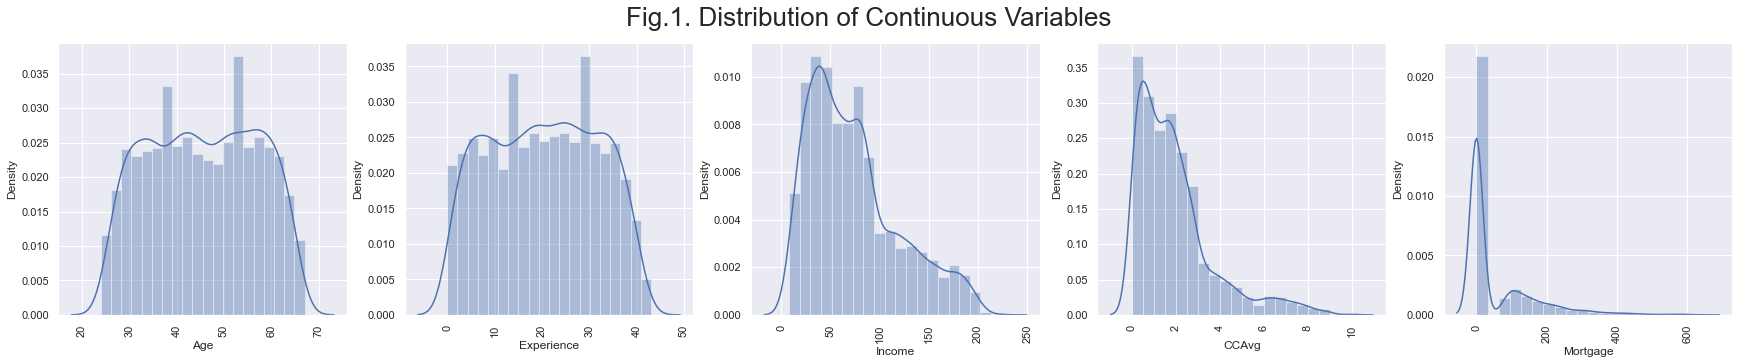

In [15]:
fig, ax = plt.subplots(1, 5, figsize=(30, 5))
for variable, subplot in zip(num_var_list, ax.flatten()):
    sns.distplot(df[variable], bins = 20, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90) 
fig.suptitle('Fig.1. Distribution of Continuous Variables', fontsize=26);

Interpretation: Age and Experience data have multimodal distribution, and their distributions are flat as expected from the descriptive analysis. Income, CC spending, and mortgage values are having right skewed distribution. Mortgage data is highly dispersed and has two clear modes– one at 0, and the other near 100.

#### 2.3. Checking Skewness and Kurtosis

In [16]:
print(blue("The skewness of the three skewed variables – Income, CCAvg, and Mortgage are :\n", ["bold"]))
skewness = df[["Income", "CCAvg", "Mortgage"]].skew(axis = 0).to_frame("Skewness")
skewness.style.applymap(lambda x: 'background-color : red' if x>1 else ('background-color : orange' if x>0.5 else ''))

The skewness of the three skewed variables – Income, CCAvg, and Mortgage are :



,Skewness
Income,0.842004
CCAvg,1.594624
Mortgage,2.104585


In [17]:
print(blue("The skewness of the two platykurtic distributed variables – Age, and Experience, and one highly dispersed but bimodal distribution Mortgage are :\n", ["bold"]))
Kurtosis = df[["Age", "Experience", "Mortgage"]].kurt(axis = 0).to_frame("Kurtosis")
Kurtosis.style.applymap(lambda x: 'background-color : red' if x>7 or x<-7 else ('background-color : orange' if x>4 or x<-4 else ''))

The skewness of the two platykurtic distributed variables – Age, and Experience, and one highly dispersed but bimodal distribution Mortgage are :



,Kurtosis
Age,-1.162000
Experience,-1.135249
Mortgage,4.765795


**Kline, 2011 suggested that the deviation of data from normality was not severe as the value of skewness and kurtosis index were below 3 and 10 respectively.** [Source: Yadav, R., & Pathak, G. S. (2016)]

#### 2.4. Checking the presence of outliers

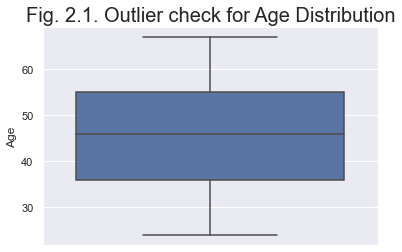

In [18]:
sns.boxplot(y="Age", x= None, data=df)
plt.title("Fig. 2.1. Outlier check for Age Distribution", fontsize=20);

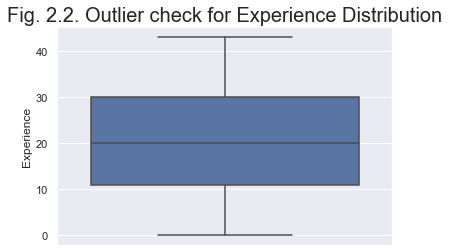

In [19]:
sns.boxplot(y="Experience", x= None, data=df)
plt.title("Fig. 2.2. Outlier check for Experience Distribution", fontsize=20);

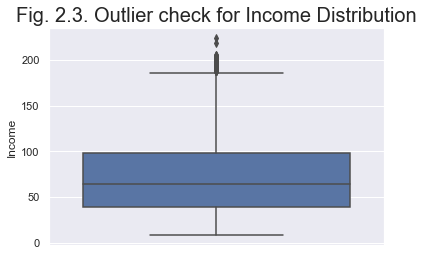

In [20]:
sns.boxplot(y="Income", x= None, data=df)
plt.title("Fig. 2.3. Outlier check for Income Distribution", fontsize=20);

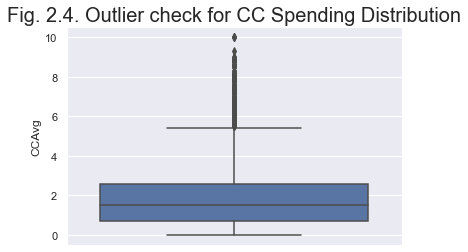

In [21]:
sns.boxplot(y="CCAvg", x= None, data=df)
plt.title("Fig. 2.4. Outlier check for CC Spending Distribution", fontsize=20);

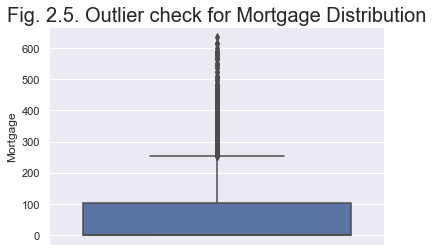

In [22]:
sns.boxplot(y="Mortgage", x= None, data=df)
plt.title("Fig. 2.5. Outlier check for Mortgage Distribution", fontsize=20);

**Interpretation of figures 2.1-2.5:** As expected through the descriptive analysis, income, CCAvg, and Mortgage data have outliers, and the number of outliers are highest in Mortgage data.

#### 2.5 Distribution of Categorical Variables

In [23]:
cat_var = ["Family", "Education", "Securities Account", "CD Account", "Online", "CreditCard"]

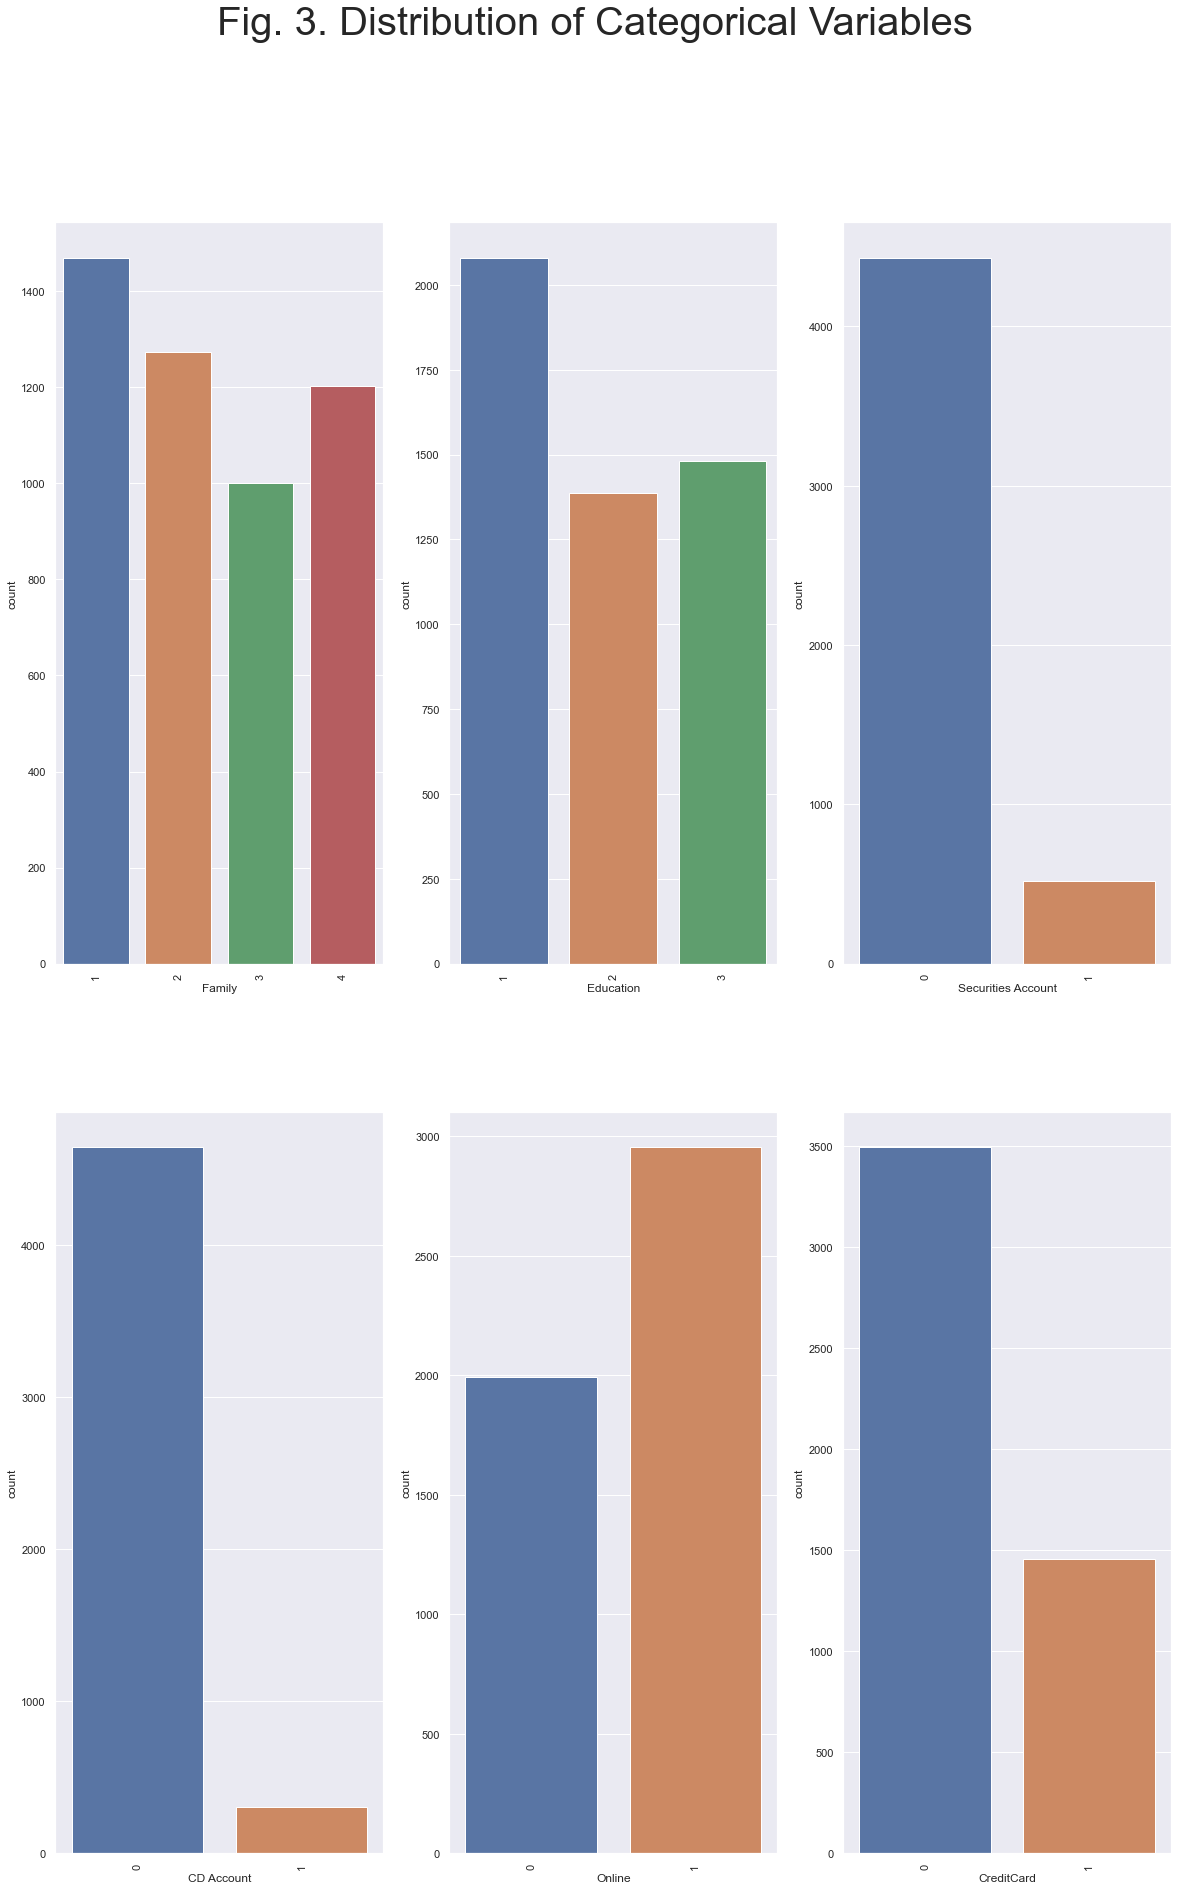

In [24]:
fig, ax = plt.subplots(2, 3, figsize=(20, 30))
for variable, subplot in zip(cat_var, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.suptitle("Fig. 3. Distribution of Categorical Variables", fontsize=40);

**I have plotted the Zip codes separately below from the multiplot for better visibility as it is expected that zip codes have higher number of unique values.**

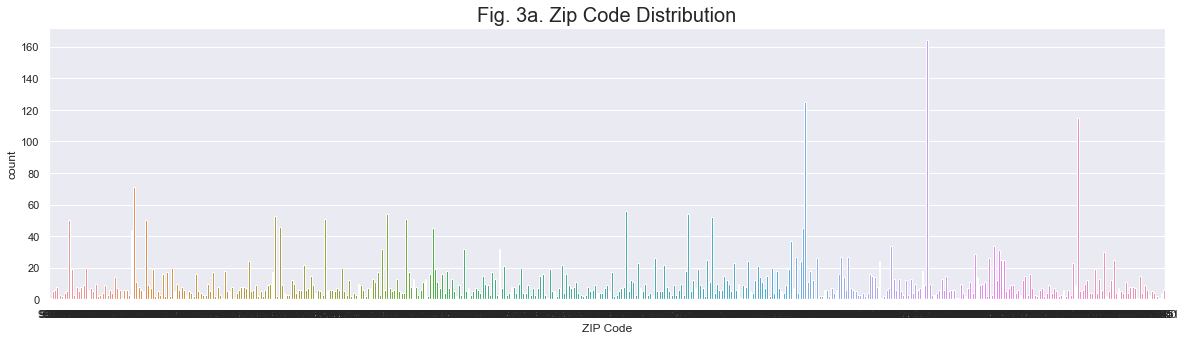

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.countplot(df["ZIP Code"])
plt.title("Fig. 3a. Zip Code Distribution", fontsize=20);

**Interpretation of Fig 3 and 3a:**
* Majority has a family size of 1.
* Majority of the individuals are undergraduate (Education = 1).
* Most of the customers do not have Securitt Account and Certificate of Deposit Account.
* Most of the customers use internet banking facilities.
* Most of the customers do not have a credit card.
* There are three zip codes from which >100 customers belong.

#### 2.6. Checking Correlation of Continuous Variables

In [26]:
corr = df.corr() # Creating the correlation matrix 
corr

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.994101,-0.058006,-0.050879,-0.015184
Experience,0.994101,1.000000,-0.049245,-0.048939,-0.013459
Income,-0.058006,-0.049245,1.000000,0.646178,0.206921
CCAvg,-0.050879,-0.048939,0.646178,1.000000,0.109905
Mortgage,-0.015184,-0.013459,0.206921,0.109905,1.000000


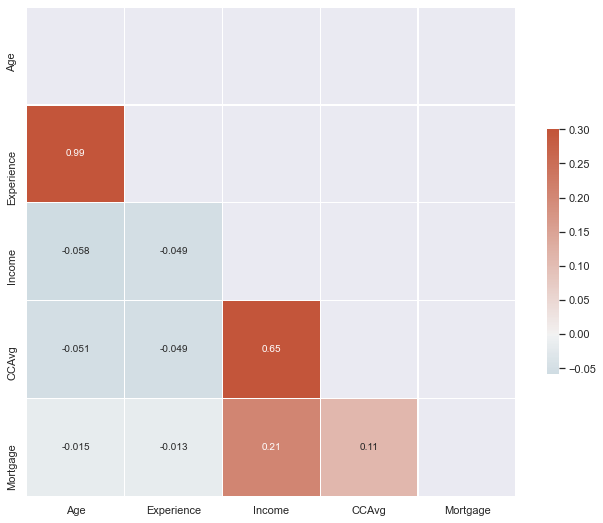

In [27]:
# Draw the heatmap with the correlation matrix
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = True, linewidths=.5, cbar_kws={"shrink": .5});

**Interpretation:**
Age and Experience are highly correlated, and income and credit card spendings are highly correlated. mortgage has some correlation with both income and credit card spending.

### Q3. Get the target column distribution. Your comments

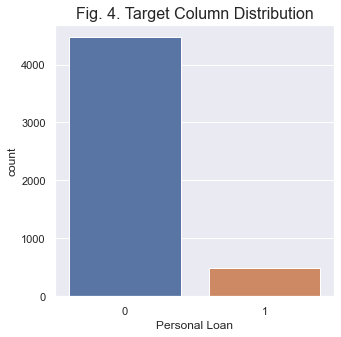

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(df["Personal Loan"])
plt.title("Fig. 4. Target Column Distribution", fontsize=16);

In [29]:
df.groupby(["Personal Loan"]).count()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,4468,4468,4468,4468,4468,4468,4468,4468,4468,4468,4468,4468
1,480,480,480,480,480,480,480,480,480,480,480,480


**Interpretation:** Class distribution among 0 and 1 is almost 9:1. It is expected that there can be class imbalance due to very low proportion of customer acceptance in the label variable.

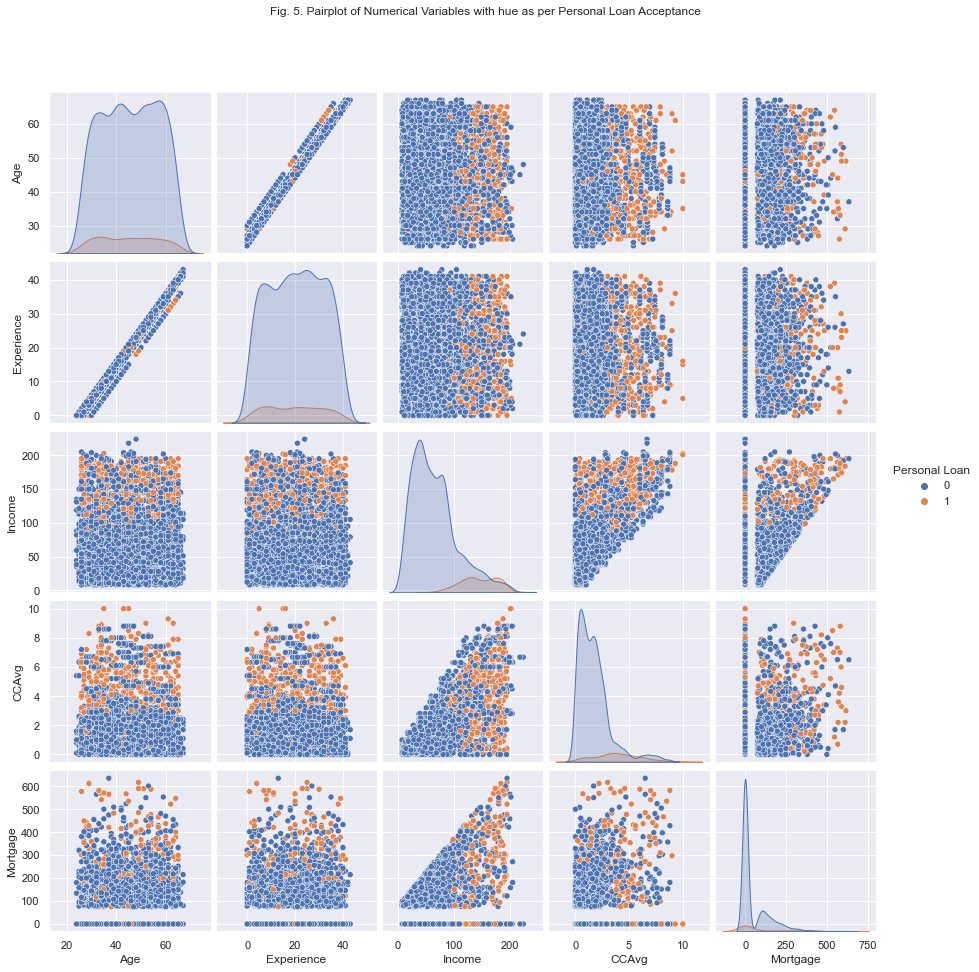

In [30]:
g = sns.pairplot(df[["Age", "Experience", "Income", "CCAvg", "Mortgage", "Personal Loan"]], diag_kind='kde', corner = False, hue = "Personal Loan")
g.fig.suptitle("Fig. 5. Pairplot of Numerical Variables with hue as per Personal Loan Acceptance", y=1.08); # y= some height>1;

**Interpretation:**  Personal Loan acceptance is greater with higher income, average spending in credit card, and mortgage amount across experience and age.

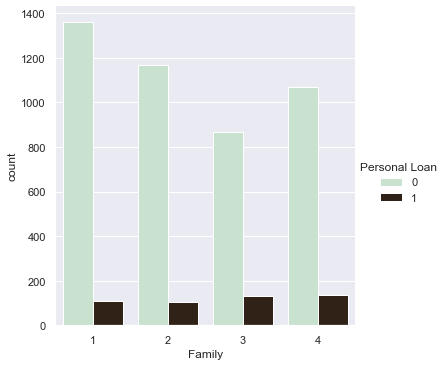

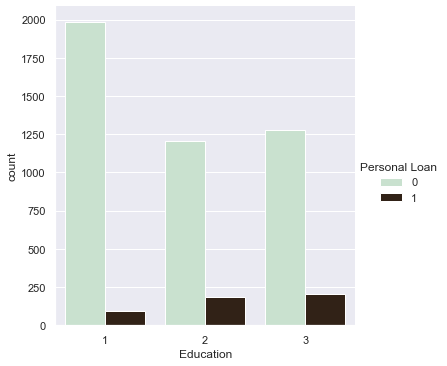

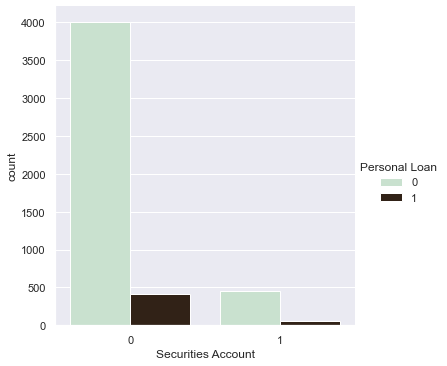

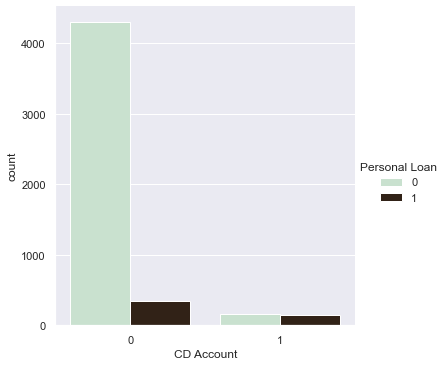

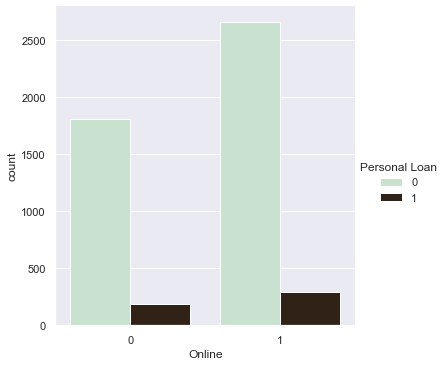

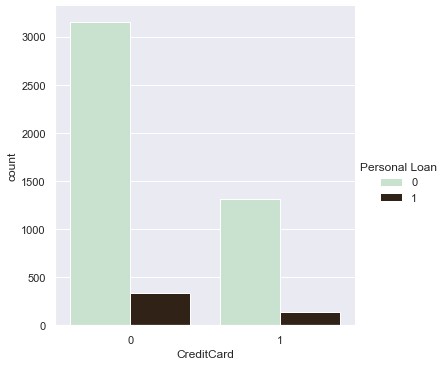

In [31]:
for col in cat_var:
    sns.catplot(x=col, hue="Personal Loan", kind="count", palette="ch:1", data=df)

**Interpretation:** Apparently, higher family size, higher education category, availability of CD account have better chance of accepting Personal Loan.

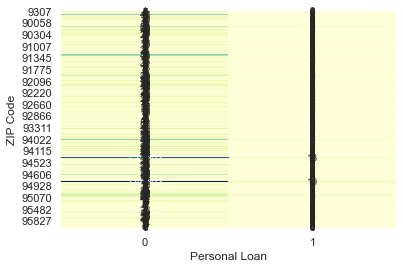

In [32]:
sns.heatmap(pd.crosstab(df["ZIP Code"], df["Personal Loan"]), cmap="YlGnBu", annot=True, cbar=False);

**Interpretation:** The acce[tability of Personal Loan does vary with Zip Code, but no discernible pattern is visible.

### Q4. Split the data into training and test set in the ratio of 70:30 respectively

In [33]:
# Setting up the data. 
# K is fixed by passing the n_neighbors parameter with integer. 
# I have used the default Euclidean distance.
lof = LocalOutlierFactor(n_neighbors = 20)
#Training the model, I drop few columns that was not a continuous variable
df['lof'] = lof.fit_predict(df[num_var_list])
#Getting the negative LOF score
df['negative_outlier_factor'] = lof.negative_outlier_factor_
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,lof,negative_outlier_factor
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1,-1.176996
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,1,-1.071624
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1,-1.020782
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,1,-1.001144
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1,-1.047994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,1,-0.976188
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,1,-1.026238
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,1,-1.006558
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,1,-1.179864


In [34]:
# Detecting the outliers
df[df['lof'] == -1]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,lof,negative_outlier_factor
914,65,41,195,91711,3,0.40,1,0,1,1,1,0,1,-1,-1.518210
3896,48,24,224,93940,2,6.67,1,0,0,0,1,1,1,-1,-2.173066
4360,67,43,41,90024,2,1.10,1,0,0,0,0,0,0,-1,-1.508766
4993,45,21,218,91801,2,6.67,1,0,0,0,0,1,0,-1,-1.682038


In [35]:
# Droping the outlier records
df = df.loc[df['lof'] >= 0]

In [36]:
print("The current dataframe now has", df.shape[0], "records.")

The current dataframe now has 4944 records.


In [37]:
# Removing the lof and negative outlier factor columns
df = df.drop(labels= "lof" , axis = 1)
df = df.drop(labels= "negative_outlier_factor" , axis = 1)

In [38]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [39]:
# Create a separate dataframe consisting only of the features i.e independent attributes
X = df.drop(labels= "Personal Loan" , axis = 1)
y = df["Personal Loan"]
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [40]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is not that important for logistic regression except for ensuring faster convergence.
# But it is especially important for models that calculate distances, like KNN.

X_Scaled  = X.apply(zscore)  # convert all attributes to Z scale 
X_Scaled.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4.944000e+03,4.944000e+03,4.944000e+03,4.944000e+03,4.944000e+03,4.944000e+03,4.944000e+03,4.944000e+03,4.944000e+03,4.944000e+03,4.944000e+03,4.944000e+03
mean,-1.659047e-16,1.212173e-16,-8.775231e-17,-5.153532e-16,-3.518401e-16,8.391795e-17,-1.370712e-16,4.480864e-16,-6.682896e-17,-2.289610e-16,1.784351e-16,-2.419855e-16
std,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00
min,-1.904149e+00,-1.797263e+00,-1.429168e+00,-3.942644e+01,-1.211423e+00,-1.108303e+00,-1.047669e+00,-5.565231e-01,-3.409972e-01,-2.541643e-01,-1.217345e+00,-6.451458e-01
25%,-8.437625e-01,-9.128439e-01,-7.552069e-01,-5.838387e-01,-1.211423e+00,-7.072612e-01,-1.047669e+00,-5.565231e-01,-3.409972e-01,-2.541643e-01,-1.217345e+00,-6.451458e-01
50%,3.989319e-02,-2.842519e-02,-2.116901e-01,1.337273e-01,-3.408889e-01,-2.489271e-01,1.433349e-01,-5.565231e-01,-3.409972e-01,-2.541643e-01,8.214601e-01,-6.451458e-01
75%,8.351833e-01,8.559935e-01,5.274927e-01,6.843627e-01,5.296455e-01,3.812822e-01,1.334339e+00,4.351603e-01,-3.409972e-01,-2.541643e-01,8.214601e-01,1.550037e+00
max,1.895570e+00,2.005738e+00,2.853744e+00,1.645036e+00,1.400180e+00,4.620872e+00,1.334339e+00,5.678318e+00,2.932576e+00,3.934463e+00,8.214601e-01,1.550037e+00


In [41]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.30, random_state=1)

### Q5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans 

**Synthetic Minority Oversampling Technique (SMOTE)**

One of the critical challenges in training a classification model is the imbalance of classes, in which the minority class, especially in BFSI, gets under-represented in the overall training set, simply because of the less occurence of the event of interest in the overall data instances. On the other hand the cost of missclassifying the minority is much higher. In order to address this problem and also to prevent loss of data, Chawla et. al, in their article, "SMOTE: Synthetic Minority Over-sampling Technique" advanced a method to create synthetic data of the minority class that showed better performance than varying the loss ratios in Ripper or class prior in Naive Bayes. I have used SMOTE here to address the issue and also get better performance from all the given classification models.

In [42]:
print(imblearn.__version__)

0.7.0


In [43]:
print("The frequency of classess of the label variable in the training data originally was:", Counter(y_train))

The frequency of classess of the label variable in the training data originally was: Counter({0: 3110, 1: 350})


In [44]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
new_counter = Counter(y_train)
print("The frequency of classess of the label variable in the training data originally was:", new_counter)

The frequency of classess of the label variable in the training data originally was: Counter({0: 3110, 1: 3110})


#### Logistic Regression

In [45]:
# Fit the model on train
lgmodel = LogisticRegression(solver="liblinear")
lgmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [46]:
#predict on test
y_log_predict = lgmodel.predict(X_test)

In [47]:
log_coef_df = pd.DataFrame(lgmodel.coef_)
log_coef_df['intercept'] = lgmodel.intercept_
print(log_coef_df)

          0         1        2         3         4         5         6  \
0 -0.570678  0.465183  2.65731 -0.069678  0.646355  0.349166  1.257236   

          7         8         9        10        11  intercept  
0 -0.055252 -0.345715  0.922881 -0.359735 -0.586488  -2.741081  


In [48]:
print(blue("Array of index numbers (table index numbers and not IDs) of customers for whom customer's personal loan was accepted ––", ["bold"]))

for x in range(len(y_log_predict)):
   if (y_log_predict[x] == 1):
      print(x, end="\t")

Array of index numbers (table index numbers and not IDs) of customers for whom customer's personal loan was accepted ––
7	9	10	20	22	24	32	34	36	38	40	51	55	74	76	77	108	112	113	122	126	129	141	144	157	164	168	170	172	175	177	182	184	186	194	213	221	243	245	249	258	260	262	269	280	286	288	294	299	301	309	312	316	320	321	335	337	340	344	358	363	364	371	377	393	398	410	415	444	458	460	476	480	500	509	522	526	527	528	542	544	556	560	561	569	578	582	584	587	589	599	600	608	610	622	629	631	638	640	645	658	660	664	677	682	716	720	727	749	768	770	772	783	785	786	805	813	820	822	826	833	836	837	847	848	851	853	855	857	864	868	870	882	887	888	891	899	919	923	926	932	934	940	941	942	943	946	950	960	964	970	972	981	982	993	995	996	1000	1006	1010	1011	1019	1035	1040	1042	1044	1047	1054	1064	1072	1078	1081	1084	1107	1108	1112	1113	1118	1120	1123	1139	1143	1147	1150	1151	1165	1168	1182	1204	1208	1217	1243	1250	1257	1259	1264	1273	1286	1290	1302	1312	1315	1318	1324	1326	1333	1339	1340	1346	1350	1354	

#### KNN Classification

In [49]:
# KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn_pred)

[0 0 0 ... 0 0 0]


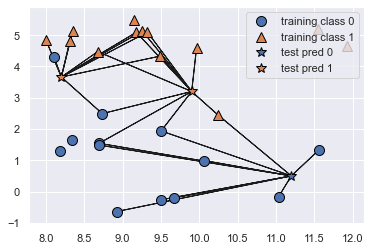

In [50]:
# KNN Plot
mglearn.plots.plot_knn_classification(n_neighbors=10)
plt.show()

In [51]:
for x in range(len(knn_pred)):
   if (knn_pred[x] == 1):
      print(x, end="\t")

9	10	20	32	33	34	36	51	55	77	100	108	112	113	117	122	126	136	141	144	150	157	164	170	172	175	177	182	184	186	194	211	220	243	249	258	260	262	269	280	286	288	294	301	309	316	319	320	321	340	344	363	364	377	391	409	415	421	422	426	444	455	463	464	477	500	522	526	542	544	556	560	561	564	571	578	584	587	588	593	599	608	610	631	640	645	657	658	663	671	696	697	711	727	752	768	770	783	786	789	803	813	820	822	826	830	833	836	847	848	851	852	855	868	899	919	927	932	934	940	941	942	950	956	960	970	993	996	999	1000	1002	1019	1040	1054	1059	1078	1081	1084	1101	1112	1113	1120	1123	1143	1147	1150	1165	1182	1192	1196	1204	1217	1227	1241	1250	1257	1276	1290	1294	1302	1308	1316	1324	1326	1333	1340	1341	1346	1355	1360	1364	1383	1391	1394	1397	1422	1423	1430	1432	1441	1449	1467	1478	

#### Gaussian Naive Bayes

In [52]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [53]:
gnb_pred = gnb.predict(X_test)

In [54]:
for x in range(len(gnb_pred)):
   if (gnb_pred[x] == 1):
      print(x, end="\t")

3	9	10	14	20	22	24	32	34	36	40	51	53	55	61	74	77	91	95	101	108	112	122	129	136	141	144	153	157	164	168	170	177	182	184	186	211	218	221	240	243	249	257	260	262	267	269	280	288	294	299	301	309	316	319	320	337	340	344	357	358	363	364	374	377	391	398	404	415	426	435	444	458	476	480	497	500	522	523	526	527	528	542	544	547	560	561	572	578	582	584	587	589	599	600	610	631	636	638	645	658	663	664	702	714	720	723	727	735	743	748	768	770	773	783	784	785	786	789	804	813	820	822	833	836	847	848	851	853	855	857	864	868	870	899	905	919	923	926	932	934	940	941	946	950	960	970	972	978	982	992	993	996	999	1000	1002	1006	1008	1012	1032	1040	1042	1047	1049	1054	1059	1072	1078	1084	1101	1108	1112	1113	1118	1120	1121	1123	1124	1142	1143	1147	1150	1151	1156	1165	1168	1182	1204	1210	1217	1247	1250	1253	1256	1257	1259	1273	1286	1290	1302	1304	1312	1315	1316	1324	1325	1326	1333	1339	1340	1342	1346	1350	1354	1355	1358	1360	1364	1383	1386	1394	1412	1416	1422	1423	1425	1432	1439	1442	1449	1467	1474	1481	

### Q6. Print the confusion matrix for all the above models

Logistic Regression Model Confusion Matrix–


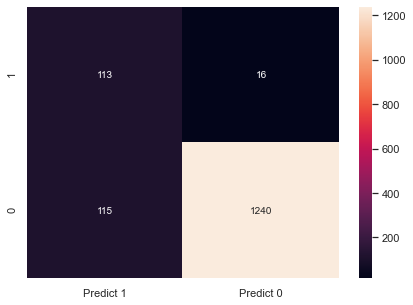

In [55]:
lgcm=metrics.confusion_matrix(y_test, y_log_predict, labels=[1, 0])

df_cm = pd.DataFrame(lgcm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(blue("Logistic Regression Model Confusion Matrix–", ["bold"]))
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

**Logistic Regression Model Confusion Matrix:**

True Positives (TP): I correctly predicted that Personal Loan Accepted 130

True Negatives (TN): I correctly predicted that Personal Loan Not Accepted 1209

False Positives (FP): I incorrectly predicted that Personal Loan Accepted (a "Type I error") 131 Falsely predict positive Type I error

False Negatives (FN): I incorrectly predicted that Personal Loan Not Accepted (a "Type II error") 15 Falsely predict negative Type II error

KNN Model Confusion Matrix–


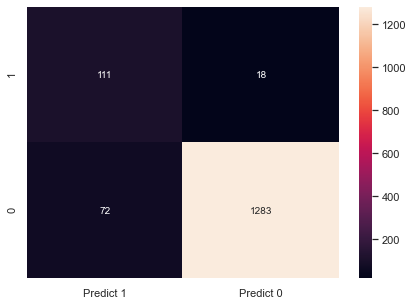

In [56]:
knncm=metrics.confusion_matrix(y_test, knn_pred, labels=[1, 0])

df_cm1 = pd.DataFrame(knncm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(blue("KNN Model Confusion Matrix–", ["bold"]))
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True, fmt='g');

**KNN Model Confusion Matrix:**

True Positives (TP): I correctly predicted that Personal Loan Accepted 128

True Negatives (TN): I correctly predicted that Personal Loan Not Accepted 1267

False Positives (FP): I incorrectly predicted that Personal Loan Accepted (a "Type I error") 73 Falsely predict positive Type I error

False Negatives (FN): I incorrectly predicted that Personal Loan Not Accepted (a "Type II error") 17 Falsely predict negative Type II error

Naive Bayes Model Confusion Matrix–


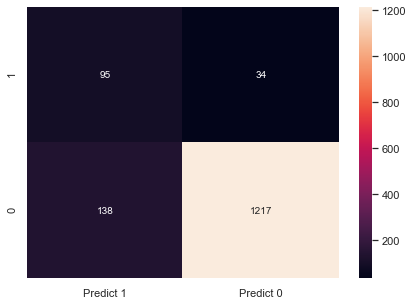

In [57]:
gnbcm=metrics.confusion_matrix(y_test, gnb_pred, labels=[1, 0])

df_cm2 = pd.DataFrame(gnbcm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(blue("Naive Bayes Model Confusion Matrix–", ["bold"]))
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True, fmt='g');

**Naive Bayes Model Confusion Matrix:**

True Positives (TP): I correctly predicted that Personal Loan Accepted 108

True Negatives (TN): I correctly predicted that Personal Loan Not Accepted 1187

False Positives (FP): I incorrectly predicted that Personal Loan Accepted (a "Type I error") 153 Falsely predict positive Type I error

False Negatives (FN): I incorrectly predicted that Personal Loan Not Accepted (a "Type II error") 37 Falsely predict negative Type II error

### Q7. Give your reasoning on which is the best model in this case and why it performs better?

In [58]:
print("Training set score of Logistic Regression Model: {:.2f}".format(lgmodel.score(X_train, y_train)))
print("Validation set score of Logistic Regression Model: {:.2f}".format(lgmodel.score(X_test, y_test)))

print("Training set score KNN Model: {:.2f}".format(knn.score(X_train, y_train)))
print("Validation set score KNN Model: {:.2f}".format(knn.score(X_test, y_test)))

print("Training set score Gaussian Naive Bayes Model: {:.2f}".format(gnb.score(X_train, y_train)))
print("Validation set score Gaussian Naive Bayes Model: {:.2f}".format(gnb.score(X_test, y_test)))

Training set score of Logistic Regression Model: 0.91
Validation set score of Logistic Regression Model: 0.91
Training set score KNN Model: 0.98
Validation set score KNN Model: 0.94
Training set score Gaussian Naive Bayes Model: 0.86
Validation set score Gaussian Naive Bayes Model: 0.88


In [59]:
print(blue("Logistic Regression Model Accuracy Matrix:"))
# precision:
precision = precision_score(y_log_predict, y_test) #find the precision score for the test data
print('Precision: %f' % precision)

# recall:
recall = recall_score(y_test, y_log_predict) #find the recall score for the test data 
print('Recall: %f' % recall)

# f1: 
f1 = f1_score(y_test, y_log_predict) #find the f1 score for the test data 
print('F1 score: %f' % f1)

# ROC AUC Score
auc = roc_auc_score(y_test, y_log_predict) #find the roc auc score for the test data 
print('ROC AUC: %f' % auc)

Logistic Regression Model Accuracy Matrix:
Precision: 0.875969
Recall: 0.875969
F1 score: 0.633053
ROC AUC: 0.895549


In [60]:
print(blue("KNN Model Accuracy Matrix:"))
# precision:
precision = precision_score(knn_pred, y_test) #find the precision score for the test data
print('Precision: %f' % precision)

# recall:
recall = recall_score(y_test, knn_pred) #find the recall score for the test data 
print('Recall: %f' % recall)

# f1: 
f1 = f1_score(y_test, knn_pred) #find the f1 score for the test data 
print('F1 score: %f' % f1)

# ROC AUC Score
auc = roc_auc_score(y_test, knn_pred) #find the roc auc score for the test data 
print('ROC AUC: %f' % auc)

KNN Model Accuracy Matrix:
Precision: 0.860465
Recall: 0.860465
F1 score: 0.711538
ROC AUC: 0.903664


In [61]:
print(blue("Naive Bayes Model Accuracy Matrix:"))
# precision:
precision = precision_score(gnb_pred, y_test) #find the precision score for the test data
print('Precision: %f' % precision)

# recall:
recall = recall_score(y_test, gnb_pred) #find the recall score for the test data 
print('Recall: %f' % recall)

# f1: 
f1 = f1_score(y_test, gnb_pred) #find the f1 score for the test data 
print('F1 score: %f' % f1)

# ROC AUC Score
auc = roc_auc_score(y_test, gnb_pred) #find the roc auc score for the test data 
print('ROC AUC: %f' % auc)

Naive Bayes Model Accuracy Matrix:
Precision: 0.736434
Recall: 0.736434
F1 score: 0.524862
ROC AUC: 0.817295


**Interpretation:**

Both Logistic Regression and KNN Classification models performed better than the Naive Bayes model. The former two are quite similar in terms of Precision and Recall. Precision is the true positive among all the positives. A similar precision means that out of all the positives detected by the two models, the probability of detecting those customers who would accept personal loan is similar. Recall is the proportion of actual positives detected as positive by the model. A similar recall indicates that both the models will predict similar number of customers out of the total who would actually accept a personal loan. An integrated indicator, the F1-score, is better for KNN compared to the logistic regression model. 

The accuracy of the KNN model is however higher, given its performance in the validation dataset. However, it is found that the KNN model tends to slightly overfit in spite of my attempt to balance the training data using SMOTE. The model can be more unstable compared to the logistic regression model.

The Receiver Operating Characteristics curve plots the True Positivity Rate (y-axis) versus the False Positivity Rate (x-axis). Higher Area Under Curve (AUC) indicates model with better skill by demarcating more accurately between those who would accept and those who won't accept the personal loan. The KNN classifier performs better in this case.

Based the overall performance, therefore, I would consider KNN as better model, given that the class imbalance in the data is addressed and also outliers are removed. If the two are not done, Logistic regression would perform better. A quick illustration is given below why and how the Logistic Regression model would be better in the absence of SMOTE and LOF.

In [62]:
df = pd.read_csv("/Users/kaushik/Desktop/GL_projects/GL_project_data/Bank_Personal_Loan_Modelling.csv") # import bank data from project folder 

In [63]:
df = df.drop(labels = "ID", axis = 1) # The first column is id column which is customer id and nothing to do with the model attriibutes. So I dropped it.

In [64]:
num_var_list = ["Age", "Experience", "Income", "CCAvg", "Mortgage"] #### Numerical Variable Grouping
cat_var_list = ["ZIP Code", "Family", "Education", "Securities Account", "CD Account", "Online", "CreditCard"] #### Categorical/ Discrete Variable Grouping
df[cat_var_list] = df[cat_var_list].astype('category')
df["Personal Loan"] = df["Personal Loan"].astype('category')

In [65]:
df = df.loc[df['Experience'] >= 0] #keeping only those records where the experience value is 0 years or above in the dataframe
print("The statement that the current dataframe is not having any record with negative experience is", df.shape[0] == 5000 - 52) #checking whether the number of records after dropping suspected invalid records is 52 less than the original number of records
print("The current dataframe now has", df.shape[0], "records.")

The statement that the current dataframe is not having any record with negative experience is True
The current dataframe now has 4948 records.


In [66]:
# Create a separate dataframe consisting only of the features i.e independent attributes
X = df.drop(labels= "Personal Loan" , axis = 1)
y = df["Personal Loan"]
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [67]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is not that important for logistic regression except for ensuring faster convergence.
# But it is especially important for models that calculate distances, like KNN.

X_Scaled  = X.apply(zscore)  # convert all attributes to Z scale 
X_Scaled.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03
mean,-3.275921e-18,-2.073254e-17,-7.813969e-18,-2.487467e-15,1.364219e-17,1.530483e-16,3.519595e-16,2.284169e-16,-3.722882e-16,2.976152e-16,1.019126e-16,1.913497e-16
std,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00
min,-1.904415e+00,-1.797485e+00,-1.427400e+00,-3.942929e+01,-1.211736e+00,-1.107815e+00,-1.046782e+00,-5.562284e-01,-3.412125e-01,-2.549552e-01,-1.217146e+00,-6.454048e-01
25%,-8.443056e-01,-8.470681e-01,-7.550646e-01,-5.834000e-01,-1.211736e+00,-7.072464e-01,-1.046782e+00,-5.562284e-01,-3.412125e-01,-2.549552e-01,-1.217146e+00,-6.454048e-01
50%,3.911848e-02,-2.926778e-02,-2.128586e-01,1.342266e-01,-3.409054e-01,-2.494542e-01,1.441762e-01,-5.562284e-01,-3.412125e-01,-2.549552e-01,8.215941e-01,-6.454048e-01
75%,8.342002e-01,8.548406e-01,5.245416e-01,6.849086e-01,5.299257e-01,3.800101e-01,1.335134e+00,4.357318e-01,-3.412125e-01,-2.549552e-01,8.215941e-01,1.549415e+00
max,1.894309e+00,2.004182e+00,3.257260e+00,1.645663e+00,1.400757e+00,4.614588e+00,1.335134e+00,5.680353e+00,2.930725e+00,3.922258e+00,8.215941e-01,1.549415e+00


In [68]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.30, random_state=1)

In [69]:
# Fit the model on train
lgmodel = LogisticRegression(solver="liblinear")
lgmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [70]:
#predict on test
y_log_predict = lgmodel.predict(X_test)

In [71]:
log_coef_df = pd.DataFrame(lgmodel.coef_)
log_coef_df['intercept'] = lgmodel.intercept_
print(log_coef_df)

          0         1         2         3        4         5       6        7  \
0 -0.293655  0.386684  2.333712  0.016975  0.72637  0.210461  1.3039  0.08911   

          8         9        10        11  intercept  
0 -0.236974  0.889643 -0.317961 -0.546089   -4.44344  


In [72]:
# KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn_pred)

[0 0 0 ... 0 0 0]


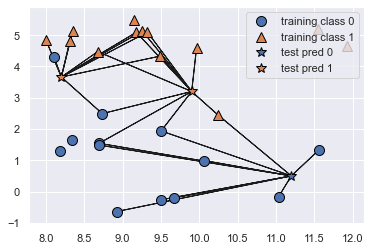

In [73]:
# KNN Plot
mglearn.plots.plot_knn_classification(n_neighbors=10)
plt.show()

In [74]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [75]:
gnb_pred = gnb.predict(X_test)

In [76]:
print(blue("Logistic Regression Model Accuracy Matrix:"))
# precision:
precision = precision_score(y_log_predict, y_test) #find the precision score for the test data
print('Precision: %f' % precision)

# recall:
recall = recall_score(y_test, y_log_predict) #find the recall score for the test data 
print('Recall: %f' % recall)

# f1: 
f1 = f1_score(y_test, y_log_predict) #find the f1 score for the test data 
print('F1 score: %f' % f1)

# ROC AUC Score
auc = roc_auc_score(y_test, y_log_predict) #find the roc auc score for the test data 
print('ROC AUC: %f' % auc)

Logistic Regression Model Accuracy Matrix:
Precision: 0.641379
Recall: 0.641379
F1 score: 0.732283
ROC AUC: 0.814720


In [77]:
print(blue("KNN Model Accuracy Matrix:"))
# precision:
precision = precision_score(knn_pred, y_test) #find the precision score for the test data
print('Precision: %f' % precision)

# recall:
recall = recall_score(y_test, knn_pred) #find the recall score for the test data 
print('Recall: %f' % recall)

# f1: 
f1 = f1_score(y_test, knn_pred) #find the f1 score for the test data 
print('F1 score: %f' % f1)

# ROC AUC Score
auc = roc_auc_score(y_test, knn_pred) #find the roc auc score for the test data 
print('ROC AUC: %f' % auc)

KNN Model Accuracy Matrix:
Precision: 0.462069
Recall: 0.462069
F1 score: 0.626168
ROC AUC: 0.730288


In [78]:
print(blue("Naive Bayes Model Accuracy Matrix:"))
# precision:
precision = precision_score(gnb_pred, y_test) #find the precision score for the test data
print('Precision: %f' % precision)

# recall:
recall = recall_score(y_test, gnb_pred) #find the recall score for the test data 
print('Recall: %f' % recall)

# f1: 
f1 = f1_score(y_test, gnb_pred) #find the f1 score for the test data 
print('F1 score: %f' % f1)

# ROC AUC Score
auc = roc_auc_score(y_test, gnb_pred) #find the roc auc score for the test data 
print('ROC AUC: %f' % auc)

Naive Bayes Model Accuracy Matrix:
Precision: 0.572414
Recall: 0.572414
F1 score: 0.477011
ROC AUC: 0.741431


**Final Comment:**

In the above simple use case, Logistic Regression outperforms both Naive Bayes and KNN.

Logistic Regression is a discriminative model compared the Naive Bayes, which is a generative model, and Logistic Regression is more robust in situation of multicollinearity. Unlike Logistic Regression and Naive Bayes, KNN is a non-parametric model. It is much slower. Naive Bayes is much more sensitive to proper scaling of the data, therefore it is done after scaling, whereas Logistic Regression may not require scaling. One advantage of Logistic Regression over the KNN is it can predict the probabilities as well.

**On balance, as default Logistic regression would be the best model, being more robust without any special treatment of the data especially in a situation of presence of outliers and substantial class imbalance. But, using specific improvisation techniques during preprocessing, like LOF and SMOTE, KNN can become even better than Logistic Regression.** 